In [1]:
from RDMM.evaluation_framework import EvaluationFramework
from pathlib import Path
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 100)
from collections import namedtuple
from tqdm.notebook import tqdm
from RDMM.utils import *

## Setting up the paths where the results of the experiments are stored

This path should be the same as the one used in `run_experiments.py`.

In [2]:
date_path=Path('06_04')
pre_folder = Path.home()/Path('experiments')

In [3]:
folder= pre_folder/date_path
frame = EvaluationFramework(folder)

In [4]:
# Code that should make matplotlib use ACM font (libertine)
import matplotlib

rc_fonts = {
    "font.family": "serif",
    "font.size": 20,
    'figure.figsize': (5, 3),
    "text.usetex": True,
    'text.latex.preamble': 
        r"""
        \usepackage{libertine}
        \usepackage[libertine]{newtxmath}
        """,
}
matplotlib.rcParams.update(rc_fonts)
#matplotlib.rcParams['pdf.use14corefonts'] = True
#matplotlib.rcParams['pdf.fonttype'] = 42
#matplotlib.rcParams['ps.fonttype'] = 42

### Below specify what kind of experiments have been conducted

Currently we have selected the "regression" (regression) model class and the exhaustive approach.

In [5]:
#model_class=Path('regression')
#model_class=Path('transition')
model_class=Path('regression')

#strategy = "mine_pair"
strategy = "exhaustive"

In [6]:
if str(model_class)=="regression":
    num_dataframes = 10
    num_parameters = 36
    num_quality_pairs = 9
    experiment_name = strategy+"_results"
elif str(model_class)=="cov":
    num_dataframes = 10
    num_parameters = 36
    num_quality_pairs = 1
    experiment_name = strategy+"5_results"

### Load the actual data

In [7]:
total_experiments=num_dataframes * num_parameters * num_quality_pairs
result_frames  = frame.evaluate_results(model_class, experiment_name, total_experiments, tqdm, allow_omit=False)

  0%|          | 0/3240 [00:00<?, ?it/s]

In [8]:
abbreviations={'LikelihoodExceptionality_transition':'Like',
'LikelihoodSimilarity':'Like',
'TotalVariationSimilarity': 'var',
 'TotalVariationExceptionality':'var',
 'ParameterDiff':'par',
 'ParameterDiff_sim':'par',
 'Cooks_sim':'Cooks',
 'Like_sim':'Like',
 'Log_sim':'Log',
 'par_sim':'par',
  'Norm 1':'Norm1'} 

In [9]:
def unstack_index(df, fun):
    new_df = df.aggregate(fun, axis=1).unstack(['ex','sim'])
    new_df = new_df.reorder_levels(['gamma', 'beta','alpha'])
    return new_df.rename(columns=abbreviations)

### Below select the evaluation criterion

In [10]:
evaluation_name='top10'
df = unstack_index(result_frames[evaluation_name], np.mean).sort_index()
df_std = unstack_index(result_frames[evaluation_name], np.std).sort_index()

In [11]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)
s = (df_std).style.background_gradient(cmap=cm)

In [12]:
display(s)

### Pickle the dataframe for faster loading

In [13]:
p = folder/model_class/experiment_name/"aggregated_df.pkl"
if not p.is_file():
    df.to_pickle(p)

In [14]:
p = folder/model_class/experiment_name/"aggregated_df_std.pkl"
if not p.is_file():
    df_std.to_pickle(p)

In [15]:

read = True

In [16]:
p = folder/model_class/experiment_name/"aggregated_df_std.pkl"
if read:
    df_std = pd.read_pickle(p)

In [17]:
p = folder/model_class/experiment_name/"aggregated_df.pkl"
if read:
    df = pd.read_pickle(p)

In [18]:
df_std

ex                    Like                         Cooks                      \
sim                   Like     Cooks       par      Like     Cooks       par   
gamma beta alpha                                                               
0.0   0.0  -1.0   0.388158  0.031623  0.042164  0.388158  0.031623  0.042164   
            0.0   0.232140  0.031623  0.000000  0.232140  0.031623  0.000000   
            0.5   0.259058  0.000000  0.000000  0.259058  0.000000  0.000000   
            1.0   0.149443  0.000000  0.000000  0.149443  0.000000  0.000000   
      0.5  -1.0   0.031623  0.105935  0.152388  0.084327  0.099443  0.176383   
            0.0   0.031623  0.103280  0.175119  0.067495  0.084327  0.133749   
            0.5   0.031623  0.113529  0.142984  0.067495  0.078881  0.108012   
            1.0   0.063246  0.073786  0.119722  0.067495  0.052705  0.067495   
      1.0  -1.0   0.031623  0.094868  0.110050  0.096609  0.097183  0.159513   
            0.0   0.031623  0.164655  0.105409  0.097183  0.110050  0.154919   
            0.5   0.031623  0.171594  0.141814  0.082327  0.137032  0.183787   
            1.0   0.031623  0.176698  0.202485  0.082327  0.134990  0.176698   
0.5   0.0  -1.0   0.388158  0.031623  0.042164  0.388158  0.031623  0.042164   
            0.0   0.232140  0.031623  0.000000  0.232140  0.031623  0.000000   
            0.5   0.259058  0.000000  0.000000  0.259058  0.000000  0.000000   
            1.0   0.149443  0.000000  0.000000  0.149443  0.000000  0.000000   
      0.5  -1.0   0.031623  0.125167  0.135401  0.084327  0.096609  0.141814   
            0.0   0.031623  0.113529  0.161933  0.067495  0.078881  0.113529   
            0.5   0.063246  0.084327  0.156347  0.067495  0.048305  0.066667   
            1.0   0.063246  0.063246  0.069921  0.070711  0.031623  0.048305   
      1.0  -1.0   0.031623  0.150555  0.128668  0.097183  0.110050  0.152388   
            0.0   0.031623  0.163639  0.179196  0.082327  0.137032  0.172884   
            0.5   0.031623  0.195789  0.188856  0.082327  0.141421  0.191195   
            1.0   0.031623  0.216282  0.240601  0.082327  0.133749  0.142984   
1.0   0.0  -1.0   0.388158  0.031623  0.042164  0.388158  0.031623  0.042164   
            0.0   0.232140  0.031623  0.000000  0.232140  0.031623  0.000000   
            0.5   0.259058  0.000000  0.000000  0.259058  0.000000  0.000000   
            1.0   0.149443  0.000000  0.000000  0.149443  0.000000  0.000000   
      0.5  -1.0   0.031623  0.126491  0.147573  0.070711  0.096609  0.117379   
            0.0   0.063246  0.096609  0.147573  0.067495  0.047140  0.107497   
            0.5   0.096609  0.073786  0.119722  0.069921  0.052705  0.067495   
            1.0   0.128668  0.048305  0.031623  0.150555  0.031623  0.031623   
      1.0  -1.0   0.031623  0.163299  0.183787  0.082327  0.105935  0.125167   
            0.0   0.031623  0.194651  0.189737  0.082327  0.133333  0.170294   
            0.5   0.031623  0.220101  0.245855  0.082327  0.133749  0.163639   
            1.0   0.067495  0.147573  0.226323  0.147573  0.082327  0.124722   

ex                     par                      
sim                   Like     Cooks       par  
gamma beta alpha                                
0.0   0.0  -1.0   0.388158  0.031623  0.042164  
            0.0   0.232140  0.031623  0.000000  
            0.5   0.259058  0.000000  0.000000  
            1.0   0.149443  0.000000  0.000000  
      0.5  -1.0   0.139841  0.056765  0.078881  
            0.0   0.103280  0.051640  0.051640  
            0.5   0.107497  0.042164  0.042164  
            1.0   0.103280  0.000000  0.000000  
      1.0  -1.0   0.103280  0.094281  0.163639  
            0.0   0.119722  0.082327  0.108012  
            0.5   0.119722  0.081650  0.108012  
            1.0   0.110050  0.051640  0.052705  
0.5   0.0  -1.0   0.388158  0.031623  0.042164  
            0.0   0.232140  0.031623  0.000000  
            0.5   0.259058  0.000000  0.000000

In [19]:
if str(model_class)=="regression":
    ex_selections = ["Like", "Cooks", "par"]
    sim_selections = ["Like","Cooks", "par"]
elif str(model_class)=="cov":
    ex_selections = ["Norm1"]
    sim_selections = ["Norm1"]

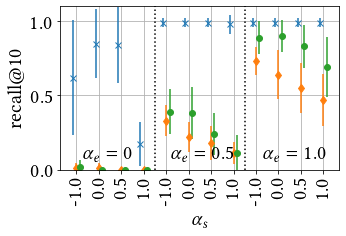

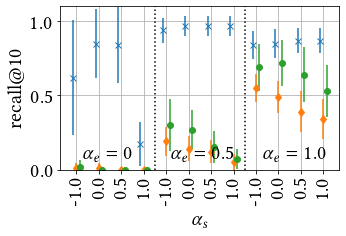

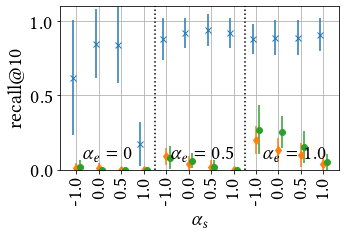

In [20]:
import matplotlib.pyplot as plt
show_reg=True

if show_reg:
    for ex_selection in ex_selections:
        fig, axs = plt.subplots(1, 1)
        dx=0
        for sim_name, dx in zip(sim_selections, 3*np.array([-0.05,0,0.05])):
            labels =[]
            values = []
            stds =[]
            for m, std in zip(df.xs(0.0, level="gamma").xs(ex_selection,level="ex", axis=1).itertuples(), df_std.xs(0.0, level="gamma").xs(ex_selection,level="ex", axis=1).itertuples()):
                assert m.Index==std.Index


                labels.append(tuple(m.Index))
                values.append(getattr(m,sim_name))
                stds.append(getattr(std,sim_name))
            x = np.arange(len(labels))
            fmt = {"Like":"x", "Cooks":"d", "par":"o", "Norm1":"x"}[sim_name]
            plt.errorbar(x+dx, values, yerr=stds, fmt=fmt, label="sim="+sim_name)

        plt.ylim(0,1.1)
        xlabels=[l[1] for l in labels]
        plt.xticks(x, xlabels, rotation='vertical')
        plt.axvline(3.5,color='k',linestyle=':')
        plt.axvline(7.5,color='k',linestyle=':')
        plt.text(0.3,0.08, r"$\alpha_e=0$", fontsize=20)
        plt.text(4.2,0.08, r"$\alpha_e=0.5$", fontsize=20)
        plt.text(8.3,0.08, r"$\alpha_e=1.0$", fontsize=20)
        #plt.legend(loc=5)
        plt.grid()
        if experiment_name.startswith("exhaustive"):
            plt.ylabel("recall@10", fontsize=20)
        else:
            plt.gca().tick_params(labelleft=False)    
        plt.xlabel(r"$\alpha_s$", fontsize=20)
        
        abbr = str(model_class)[:3]
        
        plt.savefig(pre_folder/Path('matplotlib_images')/f'synthetic-{abbr}-top10-{experiment_name}-ex-{ex_selection}.pdf',bbox_inches = 'tight')
        plt.savefig(pre_folder/Path('matplotlib_images')/f'synthetic-{abbr}-top10-{experiment_name}-ex-{ex_selection}.png',bbox_inches = 'tight')
        plt.show()
            

### Export the legend:

(0.05, 0.05)


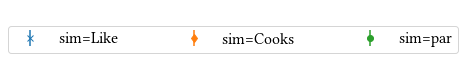

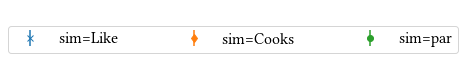

In [21]:
fig, legend_ax = plt.subplots(1, 1,figsize=(6.5, 1.5), sharey=True)
fig.set_tight_layout(True)
handles, labels = axs.get_legend_handles_labels()
legend_ax.axis('off')
print(legend_ax.margins())

fontsize=16
fig.legend(handles, labels, loc='center', mode="expand", ncol=6,  fontsize=fontsize)
display(fig)

filetype="pdf"
fig.savefig(pre_folder/Path('matplotlib_images')/(f'legend{fontsize}.'+filetype))

### Below export the results  for use in latex

In [22]:
export_latex=False

In [23]:
import math
def str_with_err(value, error):
    digits = -int(math.floor(math.log10(error)))
    return "{0:.{2}f}({1:.0f})".format(value, math.floor(error*10**digits), digits)

def to_k_digits(value,error,k):
    return "${0:.0f}\pm {1:02.0f}$".format(value*10**k, error*10**k, k)
def merge_mean_std(mean_df, std_df):
    new_tpls=[]
    for (row_mean,row_std) in zip(mean_df.itertuples(), std_df.itertuples()):
        new_tpls.append(tuple(to_k_digits(m,s,2) for m,s in zip(row_mean[1:],row_std[1:])))
    return pd.DataFrame.from_records(new_tpls, index = mean_df.index, columns=mean_df.columns)
df_merged=merge_mean_std(df,df_std)

In [24]:

if export_latex:
    with open(Path.home()/Path('experiments')/date_path/model_class/(evaluation_name+'.tex'),'w') as outfile:
        outfile.write(df.sort_index().to_latex())
        
    with open(Path.home()/Path('experiments')/date_path/model_class/(evaluation_name+'_std.tex'),'w') as outfile:
        outfile.write(df_merged.sort_index().to_latex(escape=False))

#### Export with colours

In [25]:
#print(df_merged.sort_index().to_latex(escape=False))


In [26]:
def add_colouring_to_table(df_str, df_mean, min_sat=0, max_sat=80):
    max_val=-10**10
    min_val=10**10
    for col in df_mean.columns:
        max_val=max(max_val, df_mean[col].max())
        min_val=min(min_val, df_mean[col].min())
    print(min_val, max_val)
    df_out=df_str.copy()
    for col in df_mean.columns:
        color_values=np.array(np.round(np.interp(np.power(df_mean[col].values,3),[0,1],[min_sat,max_sat])),dtype=int)
        color_strs=[]
        for i,val in enumerate(color_values):
            color_strs.append("\cellcolor{green!"+str(val)+"!white}"+str(df_str[col].values[i]))
        df_out[col]=color_strs
    return df_out
def highlight_max_values_in_column(df_str, df_mean):
    max_dict={col:df_mean[col].max() for col in df_mean.columns}

    df_out=df_str.copy()
    for col in df_mean.columns:
        should_highlight = df_mean[col].values==max_dict[col]
        for i,val in enumerate(df_mean[col]):
            if should_highlight[i]:
                 df_out[col][i]=r"\textbf{"+df_out[col].values[i]+"}"
    return df_out

def highlight_exceptionalities(df_str, df_mean,column_count):
    df_out=df_str.copy()
    for k in range(0,len(df_mean.columns),column_count):
        arrs=[]
        for j in range(0, column_count):
            arrs.append(df_mean[df_mean.columns[k+j]].to_numpy())
        maxes=np.argmax(np.array(arrs),axis=0)
        for j in range(0, column_count):
            col=df_mean.columns[k+j]
            values=df_out[col].to_numpy()
            for i in range(len(df_out)):
                if maxes[i]==j:
                    values[i]=r"\textit{"+values[i]+"}"
    return df_out
def apply_highlights(df_str,df_mean):
    return add_colouring_to_table(df_str,df_mean)

In [27]:
#print(highlight_exceptionalities(df_merged, df,3).to_latex(escape=False))

In [28]:
#del df, df_merged, df_std
if export_latex:
    for evaluation_name in ['top10','top25','mir']:
        #evaluation_name='top10'
        df = unstack_index(result_frames[evaluation_name], np.mean).sort_index()
        df_std = unstack_index(result_frames[evaluation_name], np.std).sort_index()
        df_merged=merge_mean_std(df,df_std)
        df_out=apply_highlights(df_merged, df)
        suffix=''
        for i in range(0,len(df.columns),8):
            df_print=df_out[df_out.columns[i:i+8]]
            df_print.index=df_print.index.rename(map({'gamma':r'$\gamma$','beta':r'$\beta$','alpha':r'$\alpha$'}.get,df_print.index.names))
            suffix='_'+str(int(i/8))
            if i==0:
                suffix=''
            out_path=folder/model_class/(str(model_class)+'_'+experiment_name+'_'+evaluation_name+suffix)
            latex_path=Path(str(out_path)+'.tex')
            df_path=Path(str(out_path)+'.pickle')
            df_std_path=Path(str(out_path)+"_std"+'.pickle')
            with open(latex_path,'w') as outfile:
                print('writing to: ', latex_path)
                outfile.write(df_print.to_latex(escape=False))
            df.to_pickle(df_path)
            df_std.to_pickle(df_std_path)

In [29]:
#display(result_frames['raw'].xs(0,level='beta').xs(0,level='gamma').xs('Like',level='ex'))

In [30]:
#display(result_frames['raw'].xs(0,level='beta').xs(0,level='gamma').xs('Log',level='ex'))